<a href="https://colab.research.google.com/github/381706-1Mityagina/Computer_vision_labs/blob/lab2/lab2_to_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image size:  torch.Size([588, 786, 3])


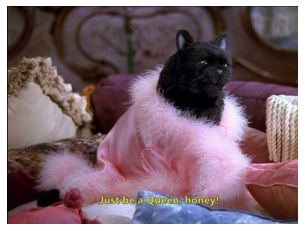

In [46]:
import torch, matplotlib
import numpy as np
import matplotlib.pyplot as plt
import imageio
matplotlib.rc('image', cmap = 'gray')

img_url = 'https://sun9-50.userapi.com/impf/c854320/v854320642/a825e/ui88KZy1j2A.jpg?size=786x588&quality=96&proxy=1&sign=00b7bbed0b620115a27d51db8d8dd7d6'
img = imageio.imread(img_url)

# Transform into pytorch tensor.
img = torch.tensor(img, dtype=torch.float) / 255.0  
# Show the image size.
print('Image size: ', img.shape)

# Plot the image.
def display_image(img):
  plt.figure(); plt.imshow(img)
  plt.grid(False);  plt.axis('off'); plt.show()
  
display_image(img)

In [47]:
import numpy as np
import cv2

def calculateValue(image, filter, i, j):
	img_h, img_w = filter.shape
	sum = 0
	for k in range(img_h):
		new_j = j
		for l in range(img_w):
			sum = sum + (filter[k][l] * image[i][new_j])
			new_j = new_j + 1
		i = i + 1
	return sum


In [83]:
def convolution3D(image, filters):  
    img_height, img_width, img_ch = image.shape
    N, filt_height, filt_width, filt_ch = filters.shape
    size_pad = 2
    res = np.zeros((img_height, img_width, N), 'uint8')
    image = np.pad(image, ((size_pad,size_pad),(size_pad,size_pad),(0,0)), 'constant')
    bias = np.random.sample(5)
    img_copy = image.copy()
  
    for ch in range(N):
          for i in range(img_width):
              for j in range(img_height):
                  res[j][i][ch] += bias[ch]
                  for x in range(filt_width):
                      for y in range(filt_height):
                          res[j][i][ch] += np.dot(image[j+y-1][i+x-1][:], filters[ch][y][x][:])

    return res

In [84]:
def all_work(image):
  img_height, img_width, img_ch = image.shape
  conv_filters = np.full((5, 3, 3, img_ch), 1/9, dtype=float)
  result = convolution3D(image, conv_filters)

  return result

In [85]:
image = imageio.imread(img_url)[:,:,:3]
res = all_work(image)
print('Image size: ', image.shape)
print('Output size (Convolution): ', res.shape)


Image size:  (588, 786, 3)
Output size (Convolution):  (588, 786, 5)


**ReLU**
f(x)=max(0,x)

In [73]:
def ReLU(image):
  img_height, img_width, img_ch = image.shape
  res = np.zeros((img_height, img_width, img_ch), 'uint8')
  for c in range(img_ch):
    for i in range(img_height):
      for j in range(img_width):
        res[i][j][c] = np.maximum(0, image[i][j][c])

  return res

res_ReLU = ReLU(res)


**Max Pooling**

In [74]:
import math

def addMaxPooling2x2(image, result):
  img_h, img_w, img_c = image.shape

  for j in range(int(img_h/2)):
      for i in range(int(img_w/2)):
          result[j][i][:] = np.maximum(np.maximum(image[j*2][i*2],image[j*2][i*2+1]),np.maximum(image[j*2+1][i*2],image[j*2+1][i*2+1]))

  return result

In [75]:
print('Original size: ', res_ReLU.shape)
img_h, img_w, img_c = res_ReLU.shape
result = np.zeros((int(img_h/2), int(img_w/2), 5), 'uint8')
res = addMaxPooling2x2(res_ReLU, result)
print('Output size (MaxPool): ', res.shape)


Original size:  (588, 786, 5)
Output size (MaxPool):  (294, 393, 5)


In [ ]:
# for k in range(5):
#   f = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])[..., None]  # Sobel filter kernel

#   # 2D filter to a 3D filter
#   img_filter_3d = np.repeat(f, 3, axis=2)

#   # image in RGB => (3,3,3)
#   R = image[:,:,0].copy()
#   G = image[:,:,1].copy()
#   B = image[:,:,2].copy()

#   R = convolution3D(R, img_filter_3d[0])
#   G = convolution3D(G, img_filter_3d[1])
#   B = convolution3D(B, img_filter_3d[2])

#   image = cv2.merge((B,G,R))